In [4]:
import warnings
warnings.warn

<function _warnings.warn>

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_valid.shape

(5000, 28, 28)

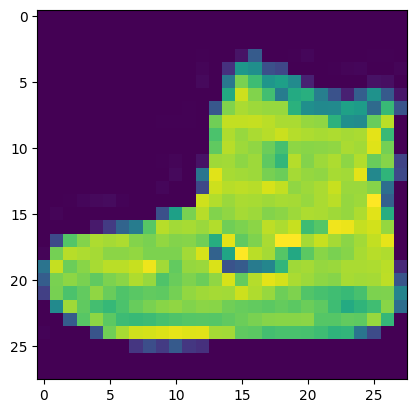

In [15]:
plt.imshow(X_train[0])

In [16]:
X_train, X_test, X_valid = X_train/255 , X_test/255, X_valid/255

In [17]:
class_names = ['T -Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [19]:
class_names[y_train[0]]

'Ankle boot'

In [21]:
X_train.shape

(55000, 28, 28)

In [22]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-22 13:03:04.395135: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6900 - loss: 0.9971 - val_accuracy: 0.8252 - val_loss: 0.5066
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.5064 - val_accuracy: 0.8418 - val_loss: 0.4552
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8423 - loss: 0.4519 - val_accuracy: 0.8498 - val_loss: 0.4306
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8530 - loss: 0.4209 - val_accuracy: 0.8530 - val_loss: 0.4163
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8601 - loss: 0.3987 - val_accuracy: 0.8560 - val_loss: 0.4055
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.3811 - val_accuracy: 0.8552 - val_loss: 0.3972
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8702 - loss: 0.3665 - val_accuracy: 0.8588 - val_loss: 0.3871
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8747 - loss: 0.3537 - 